# 01 Prepare Training Datasets

## Set up Modelling Environment

In [1]:
%pip install rasterio
%pip install geopandas

  Using cached rasterio-1.2.10-cp37-cp37m-manylinux1_x86_64.whl (19.3 MB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Obtaining dependency information for fiona>=1.8 from https://files.pythonhosted.org/packages/22/51/c6b4c2ed21a5e390730a6d5cd926009bfe02b4f27c352b069d514a5bb70e/fiona-1.9.5-cp37-cp37m-manylinux2014_x86_64.whl.metadata
  Using cached fiona-1.9.5-cp37-cp37m-manylinux2014_x86_64.whl.metadata (49 kB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
Using cached fiona-1.9.5-cp37-cp37m-manylinux2014_x86_64.whl (15.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import json
import math
import rasterio
import pandas as pd
import numpy as np
import geopandas as gpd
import os

## Input Big Query data and select test dataset

In [3]:
# The following two lines are only necessary to run once.
# Comment out otherwise for speed-up.
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

query = """SELECT * FROM `imposing-mind-398223.meterdataset.landfill`"""
job = client.query(query)
df = job.to_dataframe()

In [4]:
df

,keyID,geography,SourceReference,SL,Facility,Source,City,State,Country,Region,geometry
0,189880,"{""coordinates"":[[[100.4982959,41.0905891],[100...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(100.493678727011 41.0947383664426)
1,181798,"{""coordinates"":[[[-127.1405641,59.641265],[-12...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-127.141066013685 59.6409046932108)
2,181822,"{""coordinates"":[[[-133.2024993,62.2496553],[-1...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-133.195612208946 62.2459385860452)
3,184905,"{""coordinates"":[[[-69.5450032,-25.1051077],[-6...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-69.5440263575014 -25.1059938247881)
4,180844,"{""coordinates"":[[[-101.6614864,56.6244262],[-1...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-101.659282264465 56.6208332839445)
...,...,...,...,...,...,...,...,...,...,...,...
38114,183980,"{""coordinates"":[[[-61.2294882,13.0150089],[-61...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,St Vincent and Grenadines,North America,POINT(-61.2289701903874 13.0152058155033)
38115,193975,"{""coordinates"":[[[138.1006504,9.5167501],[138....",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Worwoq,State of Yap,Federated States of Micronesia,Oceania,POINT(138.100725992949 9.51641215510502)
38116,184753,"{""coordinates"":[[[-68.3319831,12.259045],[-68....",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,"Bonaire, Sint Eustatius, and Saba",North America,POINT(-68.3321177672005 12.2583334050387)
38117,184748,"{""coordinates"":[[[-68.2283908,12.176514],[-68....",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Kralendijk,Bonaire,"Bonaire, Sint Eustatius, and Saba",North America,POINT(-68.2274712300856 12.1757752860867)


In [5]:
# result = df[df['geometry'] == 'POINT(132 41.8333989766103)']
# print(result)
# result = df[df['keyID'] == 193816]
# print(result)

In [6]:
df_test = df.iloc[:35000].copy()

In [7]:
df_test

,keyID,geography,SourceReference,SL,Facility,Source,City,State,Country,Region,geometry
0,189880,"{""coordinates"":[[[100.4982959,41.0905891],[100...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(100.493678727011 41.0947383664426)
1,181798,"{""coordinates"":[[[-127.1405641,59.641265],[-12...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-127.141066013685 59.6409046932108)
2,181822,"{""coordinates"":[[[-133.2024993,62.2496553],[-1...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-133.195612208946 62.2459385860452)
3,184905,"{""coordinates"":[[[-69.5450032,-25.1051077],[-6...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-69.5440263575014 -25.1059938247881)
4,180844,"{""coordinates"":[[[-101.6614864,56.6244262],[-1...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,,,,,POINT(-101.659282264465 56.6208332839445)
...,...,...,...,...,...,...,...,...,...,...,...
34995,202436,"{""coordinates"":[[[30.979949,-29.7061882],[30.9...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Phoenix,KwaZulu-Natal,South Africa,Africa,POINT(30.9802316963849 -29.7065465005256)
34996,202427,"{""coordinates"":[[[30.9780259,-29.7094262],[30....",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Phoenix,KwaZulu-Natal,South Africa,Africa,POINT(30.9781422884262 -29.7094481989595)
34997,202515,"{""coordinates"":[[[30.988065,-29.6946585],[30.9...",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Phoenix,KwaZulu-Natal,South Africa,Africa,POINT(30.9883479856741 -29.6945737408189)
34998,202746,"{""coordinates"":[[[31.0312556,-29.6895545],[31....",Open Street Map (downloaded by Michael: 101_os...,https://planet.openstreetmap.org/,Landfills,Landfill_011_OSMv1,Phoenix,KwaZulu-Natal,South Africa,Africa,POINT(31.0312814463586 -29.6896361565823)


## Download the satellite image from Bing Maps

In [8]:
path="satellite_images/train/"

In [9]:
zoom_level=17
img_width=256
img_height=256

In [10]:
bing_maps_key = "AkSkwnwR0ZjzreT0mW9x70F7lOloEOAE6vUvJdJB2uX8ruQgcvOcPXm7bg4j5_gr"

In [11]:
import requests

def save_satellite_image(latitude, longitude, path, zoom_level=zoom_level, img_width=img_width, img_height=img_height, api_key=bing_maps_key):
    
    """
    Download satellite image from Bing Maps.

    Parameters:
    - latitude (float): Latitude of the center of the image.
    - longitude (float): Longitude of the center of the image.
    - zoom_level (int): Zoom level of the image (from 1 to 19).
    - bing_maps_key (str): Your Bing Maps API key.
    - save_path (str): Path to save the image.

    Returns:
    None
    
    Reference:
    https://learn.microsoft.com/en-us/bingmaps/rest-services/imagery/get-a-static-map
    """
    
    # Endpoint URL
    endpoint_url = "https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/"

    # Form the URL
    url = f"{endpoint_url}{latitude},{longitude}/{zoom_level}?mapSize={img_width},{img_height}&64&format=png&key={api_key}" 

    # Make the request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
    else:
        print(f"Error: {response.status_code}. Check your API key and query.")

In [12]:
def get_coordinate(point):
    # Remove the "POINT(" prefix and the ")" suffix
    stripped_point = point.replace("POINT(", "").replace(")", "")
    
    # Split the string into y and x parts
    y_str, x_str = stripped_point.split()
        
    # Convert the string representations to float
    y_float, x_float = float(y_str), float(x_str)
    
    return y_float, x_float

In [13]:
def download_satellite_image(row):
    # Get the central coordinate
    point = row['geometry']
    y, x = get_coordinate(point)  # Assuming this function returns longitude (x) and latitude (y)
    
    # Create and save satellite images in png format
    image_path = path + f"png/{y}_{x}.png"
    save_satellite_image(x, y, image_path)

In [14]:
# df_test.apply(download_satellite_image, axis=1)

In [15]:
# Count files in a folder
def count_files(directory_path):
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    return len(files)

directory_path = 'satellite_images/train/png'  # Replace with your directory path
print(count_files(directory_path))

35000


## Convert satellite imags from png files to geo tiff files with a single band

In [16]:
def calculate_bounding_box(latitude, longitude, zoom_level, img_width, img_height):
    # Calculate the change in degrees for the given image dimensions and zoom level
    change_in_degrees_lon = (360 / (256 * 2**zoom_level)) * img_width
    change_in_degrees_lat = (360 / (256 * 2**zoom_level)) * img_height / math.cos(math.radians(latitude))
    
    # Calculate the bounding box
    upper_left_x = longitude - change_in_degrees_lon / 2
    upper_left_y = latitude + change_in_degrees_lat / 2
    lower_right_x = longitude + change_in_degrees_lon / 2
    lower_right_y = latitude - change_in_degrees_lat / 2
    
    return upper_left_x, upper_left_y, lower_right_x, lower_right_y

In [17]:
import warnings
from rasterio.transform import from_bounds
from rasterio.crs import CRS
from rasterio.errors import NotGeoreferencedWarning

def png_to_geotiff(input_path, output_path, bounding_box):
    # Suppress the NotGeoreferencedWarning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=NotGeoreferencedWarning)

        # Extract bounding box
        upper_left_x, upper_left_y, lower_right_x, lower_right_y = bounding_box

        # Define the geospatial transform and coordinate system
        transform = from_bounds(upper_left_x, lower_right_y, lower_right_x, upper_left_y, img_width, img_height)
        crs = CRS.from_epsg(4326)  # Assuming WGS84

        # Read the PNG image
        with rasterio.open(input_path, 'r') as src:
            img_data = src.read()
            # print("original: "+str(img_data.shape))

            # Check if the image is RGB
            if img_data.shape[0] == 3:
                # Convert to grayscale using the luminosity method
                grayscale = 0.299 * img_data[0] + 0.587 * img_data[1] + 0.114 * img_data[2]
                grayscale = np.expand_dims(grayscale, axis=0)
            else:
                # If the image is already grayscale, use it directly
                grayscale = img_data   
            
            # print("converted: "+str(grayscale.shape)) 
            
            # Create a new GeoTIFF file with the grayscale data, transform, and CRS
            with rasterio.open(output_path, 'w', driver='GTiff', 
                               width=src.width, height=src.height,
                               count=1, dtype=grayscale.dtype,
                               transform=transform, crs=crs) as dst:
                dst.write(grayscale)

In [18]:
def convert_png_to_geotiff(row):
    # Get the central coordinate
    point = row['geometry']
    y, x = get_coordinate(point)  # Assuming this function returns longitude (y) and latitude (x)
    
    #Creat the bouding box for each coordinate
    latitude = x
    longitude = y
    bounding_box = calculate_bounding_box(latitude, longitude, zoom_level, img_width=img_width, img_height=img_height)
    
    # Convert and save satellite images in geotiff format
    input_path = path + f"png/{y}_{x}.png"
    output_path = path + f"image/{y}_{x}.tif"
    png_to_geotiff(input_path, output_path, bounding_box)

In [19]:
# df_test.apply(convert_png_to_geotiff, axis=1)

## Generate masks for landfills

In [20]:
from shapely.geometry import shape
from rasterio.features import rasterize

def generate_mask(row):
    # Get the central coordinate
    point = row['geometry']
    y, x = get_coordinate(point)  # Assuming this function returns longitude (y) and latitude (x)
    
    # Parse JSON
    json_data = row['geography']
    
    # Create Polygon
    data = json.loads(json_data)
    polygon = shape(data)
    
    # Define the Raster's Extent and Resolution
    bounds = polygon.bounds
    transform = rasterio.transform.from_bounds(bounds[0], bounds[1], bounds[2], bounds[3], 256, 256)
    
    # Rasterize the Polygon
    mask = rasterize([(polygon, 1)], out_shape=(256, 256), transform=transform, fill=0, all_touched=True, dtype=rasterio.uint8)
   
    # Save as GeoTIFF
    mask_path = path + f"mask/{y}_{x}.tif"
    with rasterio.open(mask_path, 'w', driver='GTiff', width=img_width, height=img_height, count=1, dtype=mask.dtype, crs="EPSG:4326", transform=transform) as dst:
        dst.write(mask, 1)

In [21]:
# df_test.apply(generate_mask, axis=1)

## Visualize satellite images and their masks

In [22]:
def plot_tiff(path):
    import matplotlib.pyplot as plt

    # Open the GeoTIFF file
    with rasterio.open(path) as src:
        img = src.read(1)  # Read the first band (or adjust as needed)

    plt.imshow(img, cmap='gray')  # Use appropriate colormap if not grayscale
    plt.colorbar()
    plt.show()

In [23]:
def show_image_mask(df, row_number):
    # Get the central coordinate
    df1 = df.iloc[row_number]
    point = df1['geometry']
    y, x = get_coordinate(point)  # Assuming this function returns longitude (y) and latitude (x)
    
    # Plot image and its mask
    plot_tiff(path + f"image/{y}_{x}.tif")
    plot_tiff(path + f"mask/{y}_{x}.tif")  

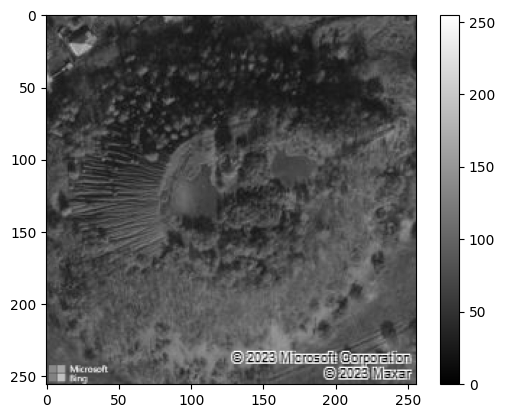

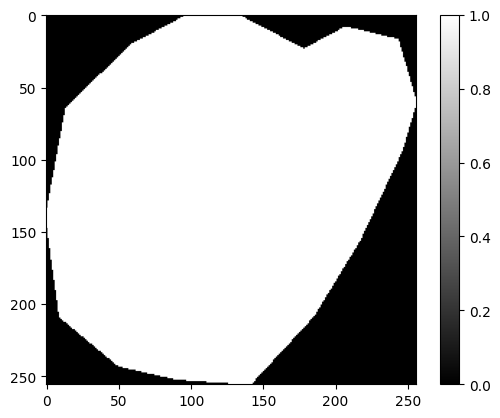

In [24]:
show_image_mask(df=df_test, row_number=30000)

## Combine geo tiff files into geo tiff stack files

In [25]:
def stack_geotiffs(input_folder, output_file):
    # List all files in the input folder
    files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.tif')]

    # # Ensure you're working with the expected number of files
    # if len(files) != 500:
    #     raise ValueError(f"Expected 100 files, but found {len(files)} files.")

    # Read each GeoTIFF file into a list and extract metadata
    images = []
    with rasterio.open(files[0]) as src:
        meta = src.meta

    for file in files:
        with rasterio.open(file) as src:
            images.append(src.read(1))  # Assuming single band images

    # Stack the images along a new dimension
    stacked_images = np.stack(images, axis=0)

    # # Ensure the stacked shape is as expected
    # if stacked_images.shape != (500, 256, 256):
    #     raise ValueError(f"Unexpected stacked shape: {stacked_images.shape}")

    # Update the metadata for the stacked image
    meta.update({
        "count": len(files),
        "dtype": stacked_images.dtype
    })

    # Write the stacked images and metadata using rasterio
    with rasterio.open(output_file, 'w', **meta) as dst:
        for idx, layer in enumerate(stacked_images, start=1):
            dst.write(layer, idx)

In [26]:
stack_geotiffs(path+"image", path+"stack/images.tif")

In [27]:
stack_geotiffs(path+"mask", path+"stack/masks.tif")

## Check the stacked geo tiff file's information

In [28]:
def read_tiff_info(file_path):
    with rasterio.open(file_path) as src:
        # Get the shape of the GeoTIFF
        height, width = src.shape
        data = src.read()
        
        # Extract geospatial metadata
        transform = src.transform
        crs = src.crs
        bounds = src.bounds
        nodata = src.nodata
        count = src.count  # number of bands/layers
        
        # Print the information
        print(data.shape)
        print(f"Shape: {height} x {width}")
        print(f"Number of Bands: {count}")
        print(f"Transform: {transform}")
        print(f"CRS: {crs}")
        print(f"Bounds: {bounds}")
        print(f"NoData Value: {nodata}")

In [29]:
read_tiff_info(path+"stack/images.tif")

(35000, 256, 256)
Shape: 256 x 256
Number of Bands: 35000
Transform: | 0.00, 0.00, 49.84|
| 0.00,-0.00, 30.69|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Bounds: BoundingBox(left=49.841429784453275, bottom=30.687919441957273, right=49.844176366484525, top=30.69111334375533)
NoData Value: None


In [30]:
read_tiff_info(path+"stack/masks.tif")

(35000, 256, 256)
Shape: 256 x 256
Number of Bands: 35000
Transform: | 0.00, 0.00, 49.84|
| 0.00,-0.00, 30.69|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Bounds: BoundingBox(left=49.8425969, bottom=30.6894035, right=49.8429885, top=30.6896272)
NoData Value: None


## Upload Files to the Google Cloud Bucket

In [31]:
# !gsutil -m cp -r {path+'/stack'} gs://meter-sam/train

Copying file://satellite_images/train//stack/images.tif [Content-Type=image/tiff]...
Copying file://satellite_images/train//stack/masks.tif [Content-Type=image/tiff]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

\ [2/2 files][ 19.2 GiB/ 19.2 GiB] 100% Done  53.5 MiB/s ETA 00:00:00           
Operation completed over 2 objects/19.2 GiB.                    

In [1]:
# !gsutil -m cp -r {path+'/image'} gs://meter-sam/train

In [2]:
# !gsutil -m cp -r {path+'/mask'} gs://meter-sam/train

In [3]:
# !gsutil -m cp -r {path+'/png'} gs://meter-sam/train

In [6]:
ls

'01_prepare datasets.ipynb'   03_SAM_Vertex_AI.ipynb   05_SAM_train_GC.ipynb
 02_fine_tune_SAM.ipynb       04_Validation.ipynb


In [7]:
!gsutil -m cp -r script gs://meter-sam

CommandException: No URLs matched: script
CommandException: 1 file/object could not be transferred.
